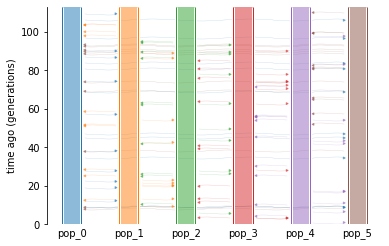

In [1]:
import demesdraw
import matplotlib.pyplot as plt
import msprime

deme_size = 1000
num_demes = 6
num_deme_samples = 5

demography = msprime.Demography.stepping_stone_model([deme_size] * num_demes, migration_rate=0.01)
graph = msprime.Demography.to_demes(demography)
ts = msprime.sim_ancestry(
    {i: num_deme_samples for i in range(num_demes)},
    sequence_length=1e6,
    demography=demography,
    recombination_rate=1e-8,
    random_seed=1234,
)
ts = msprime.sim_mutations(ts, rate=1e-8, random_seed=1234)

positions = {f"pop_{i}": i*deme_size*3 for i in range(num_demes)}

fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
demesdraw.tubes(graph, ax=ax, positions=positions, seed=111)
plt.show()

In [ ]:
ts.Fst([ts.samples(0), ts.samples(5)], mode="branch")

In [ ]:
ts.samples(0)

In [ ]:
ts.genealogical_nearest_neighbours()

In [12]:
import tsinfer
import tsdate
sample_data = tsinfer.SampleData.from_tree_sequence(ts)
inferred_ts = tsinfer.infer(sample_data)
dated_ts = tsdate.date(tsdate.preprocess_ts(inferred_ts), mutation_rate=1e-8, Ne=6000, ignore_oldest_root=True)

In [14]:
print(
    ts.Fst([ts.samples(0), ts.samples(5)]),
    ts.Fst([ts.samples(0), ts.samples(5)], mode="branch"),
    inferred_ts.Fst([inferred_ts.samples(0), inferred_ts.samples(5)]),
    inferred_ts.Fst([inferred_ts.samples(0), inferred_ts.samples(5)], mode="branch"),
    dated_ts.Fst([dated_ts.samples(0), dated_ts.samples(5)]),
    dated_ts.Fst([dated_ts.samples(0), dated_ts.samples(5)], mode="branch"),
    sep="\n",
)

0.0011668296023326086
-0.0016344526874376708
0.0011668296023326086
-0.002301504109982755
0.0011668296023326086
-0.0015232000571823168


In [15]:
print(
    ts.divergence([ts.samples(0), ts.samples(5)]),
    ts.divergence([ts.samples(0), ts.samples(5)], mode="branch"),
    inferred_ts.divergence([inferred_ts.samples(0), inferred_ts.samples(5)]),
    inferred_ts.divergence([inferred_ts.samples(0), inferred_ts.samples(5)], mode="branch"),
    dated_ts.divergence([dated_ts.samples(0), dated_ts.samples(5)]),
    dated_ts.divergence([dated_ts.samples(0), dated_ts.samples(5)], mode="branch"),
    sep="\n",
)

0.00024691999999999867
25124.869940097076
0.00024691999999999867
1.2462826071333923
0.00024691999999999867
24362.068197621622


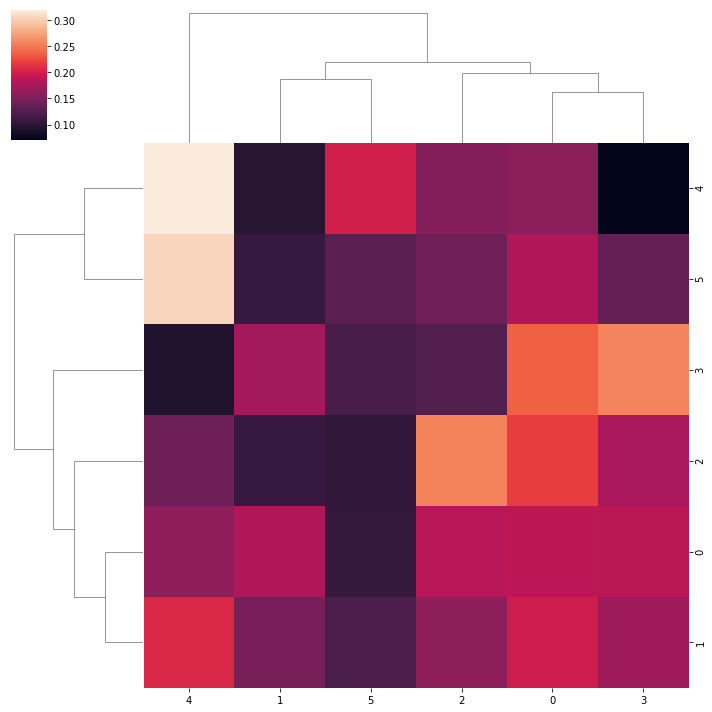

In [25]:
import numpy as np

a = np.array([
    np.mean(
        ts.genealogical_nearest_neighbours(ts.samples(i), [ts.samples(j) for j in range(num_demes)]),
        axis=0,
    )
    for i in range(num_demes)
])

import seaborn as sns
sns.clustermap(a)

In [19]:
?np.mean

Signature:
np.mean(
    a,
    axis=None,
    dtype=None,
    out=None,
    keepdims=<no value>,
    *,
    where=<no value>,
)
Docstring:
Compute the arithmetic mean along the specified axis.

Returns the average of the array elements.  The average is taken over
the flattened array by default, otherwise over the specified axis.
`float64` intermediate and return values are used for integer inputs.

Parameters
----------
a : array_like
    Array containing numbers whose mean is desired. If `a` is not an
    array, a conversion is attempted.
axis : None or int or tuple of ints, optional
    Axis or axes along which the means are computed. The default is to
    compute the mean of the flattened array.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, a mean is performed over multiple axes,
    instead of a single axis or all the axes as before.
dtype : data-type, optional
    Type to use in computing the mean.  For integer inputs, the default
    is `float64`; for floating poi